### Ridge Regression

Ridge Regression is a Standard Technique used when the data suffers with multicollinearity. In multicollinearity, even if the <b>least square estimates (OLS) are unbiased</b> (https://www.youtube.com/watch?v=n5vh2CozAlU), the variance are large which deviate original value from true value. Ridge Regression adds a degree of biasness to the regression estimates, which reduces the standard error.

The normal Linear Regression is:

y = mx+b

The ridge regression adds a degree of biasness to it;

y = mx+b+e ( error term is value needed to correct the predicted error between the actual and predicted value)



The linear equation, the predicted errors can be decomposed into 2 sub components. 

1. Bias
2. Variance

Predicted errors can occur due to any of the 2 or both. Here we'll discuss about the error caused by Variance. Ridge Regression fixes the multicollinearity problem using the shrinkage parameter (lambda). Look at the equation below;

argmin (y - X*Beta0)^2 + lambda*(Beta0)^2

argmin (y - X*Beta0)^2 => loss => least square term

lambda => shrinkage parameter => adjustment to loss. This is added to the least square term in order to shrink the parameter to have a low variance.

How ridge regression(L2 Regularization) solves the bias & variance error?

https://www.youtube.com/watch?v=Q81RR3yKn30


### Lasso Regression
Least Absolute Shrikage and Operator Selection



Same like Ridge Regression, Lasso Regression (L1 regularization) minimizes the variance of the model with one major difference i.e. in the penalty it uses absolute values of coefficient instead of their squares. This leads to penalizing values that some of the coefficient values become 0 (some of the features are discarded). Hence it helps in variable selection from n variables.

#### How the Lasso Regression sets the slope to completely 0 instead of approx 0 (like ridge Regression)?

When the lasso regression approximates the parameters (slope), the absolute value of slope is used instead of the square(unlike the ridge regression). Using the higher value of lambda causes the penalty to be even higher (when the line shrinks )...?

#### Implementation of Ridge Regression...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
x = [i*np.pi/180 for i in range(10,360,3)]

In [4]:
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [5]:
df = pd.DataFrame(data=np.column_stack([x,y]), columns=['x','y'])

In [6]:
df.head()

,x,y
0,0.174533,0.269534
1,0.226893,0.244836
2,0.279253,0.521189
3,0.331613,0.174367
4,0.383972,0.457587


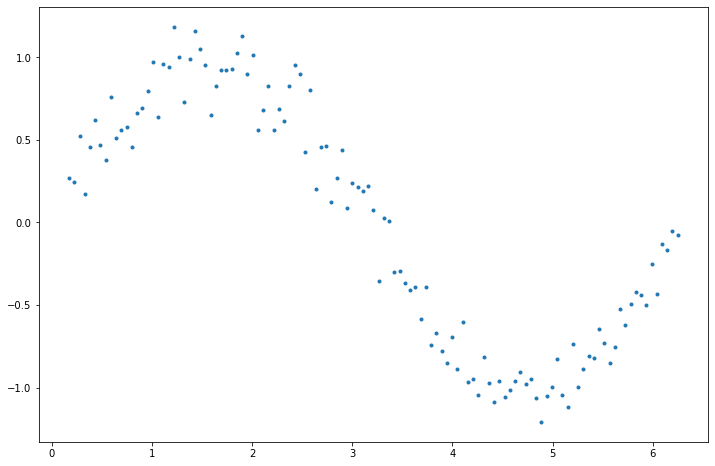

In [7]:
# Plotting the extracted values...
plt.figure(figsize=(12,8))
plt.plot(x,y, '.')

y is a sin function of x

##### Simple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
simple_linear = LinearRegression(normalize=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df[['y']], test_size=0.3, random_state=36)

In [11]:
simple_linear.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [12]:
predictions = simple_linear.predict(X_test)

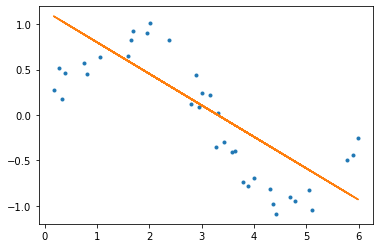

In [13]:
# plt.plot(predictions)
plt.plot(X_test.values,y_test.values,'.')
plt.plot(X_test.values, predictions)

For further iterations of biased version of model, let's create multiple powers of x column

In [14]:
for i in range(1,16):
    df[f'x_{i}'] = df['x']**i

In [15]:
df.head()

,x,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.269534,0.174533,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.244836,0.226893,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.521189,0.279253,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.174367,0.331613,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.457587,0.383972,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


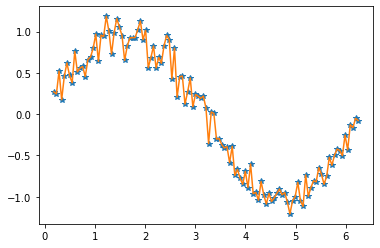

In [49]:
plt.plot(df['x'], df['y'], '*')
plt.plot(df['x_1'], df['y'])

In [27]:
df['x'].min()

0.17453292519943295

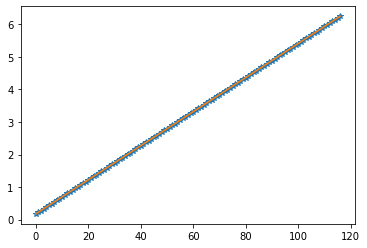

In [21]:
plt.plot(df['x'], '*')
plt.plot(df['x_1'])

In [36]:
X = df.drop(columns='y').copy()
y = df['y'].copy()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=36)

In [64]:
# the resultant dataset in which we'll store the values of the predictive iterations...
result_df = pd.DataFrame(columns=['Number of Iterations', 'mrss_Train', 'mrss_Test', 'Intercept'], 
            index=[f'n{i}' for i in range(1,16)])

In [65]:
# to plot a smooth line chart of predicted values, we need to sort the values, otherwise the line chart is a 
# kata mata instead of a smooth plot
X_train = train.drop(['y'], axis=1).copy()
y_train = train['y'].copy()
X_test = test.drop(['y'], axis=1).copy()
y_test = test['y'].copy()

In [59]:
X_train.sort_index(inplace=True)
X_test.sort_index(inplace=True)
y_train.sort_index(inplace=True)
y_test.sort_index(inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

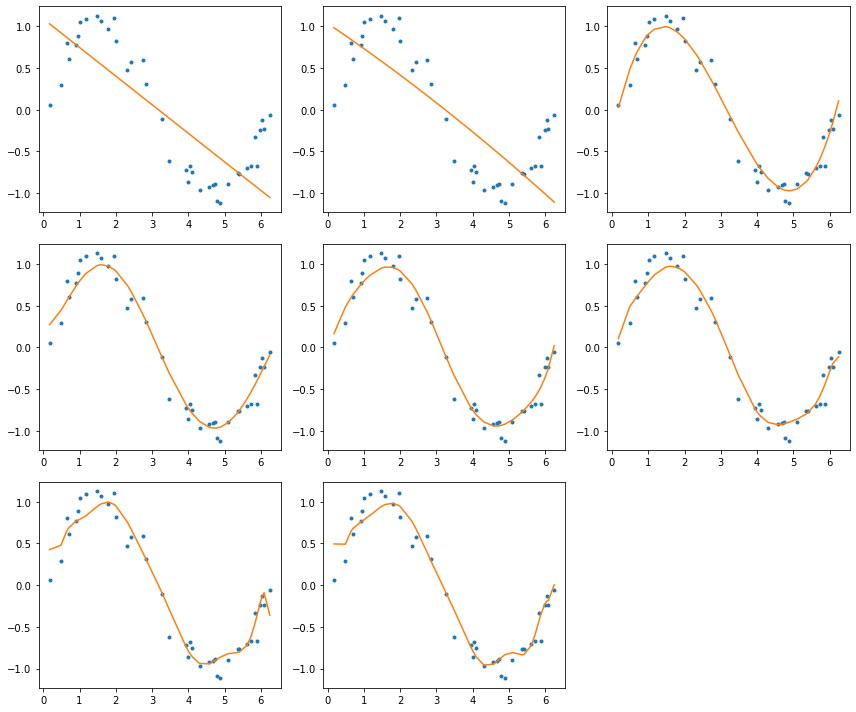

In [66]:
dict_plot = {1:331, 3:332, 5: 333, 7: 334, 9: 335, 11: 336, 13: 337, 15: 338, 16: 339}
plt.figure(figsize=(12,10))
for i in range(1,16):
    model = LinearRegression(normalize=True)
    model.fit(X_train.iloc[:, :i], y_train)
    # train predictions
    train_predictions = model.predict(X_train.iloc[:,:i])
    # test predictions
    test_predictions = model.predict(X_test.iloc[:,:i])
    # train error - bias of model
    train_error = sum((train_predictions-y_train)**2)/y_train.shape[0]
    # test error - variance of model
    test_error = sum((test_predictions-y_test)**2)/y_test.shape[0]
    result_df.loc[f'n{i}'] = [i, train_error, test_error, model.intercept_]
    if i in dict_plot:
        plt.subplot(dict_plot[i])
        plt.tight_layout()
        plt.plot(X_test['x'].values, y_test, '.')
        plt.plot(X_test['x'].values, test_predictions)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

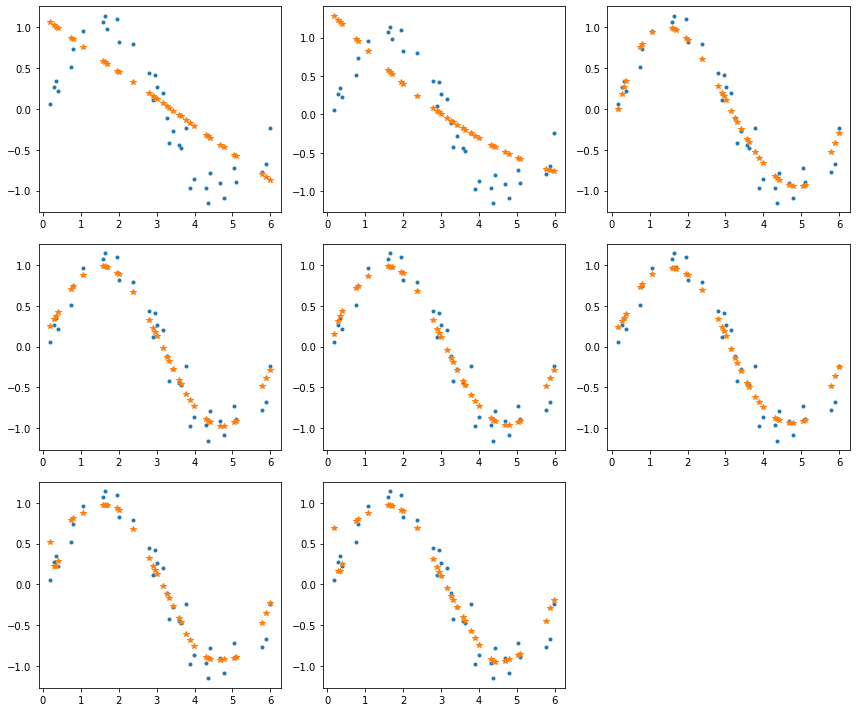

In [41]:
dict_plot = {1:331, 3:332, 5: 333, 7: 334, 9: 335, 11: 336, 13: 337, 15: 338, 16: 339}
plt.figure(figsize=(12,10))
for i in range(1,16):
    model = LinearRegression(normalize=True)
    model.fit(X_train.iloc[:, :i], y_train)
    # train predictions
    train_predictions = model.predict(X_train.iloc[:,:i])
    # test predictions
    test_predictions = model.predict(X_test.iloc[:,:i])
    # train error - bias of model
    train_error = sum((train_predictions-y_train)**2)/y_train.shape[0]
    # test error - variance of model
    test_error = sum((test_predictions-y_test)**2)/y_test.shape[0]
    result_df.loc[f'n{i}'] = [i, train_error, test_error, model.intercept_]
    if i in dict_plot:
        plt.subplot(dict_plot[i])
        plt.tight_layout()
        plt.plot(X_test['x'].values, y_test, '.')
        plt.plot(X_test['x'].values, test_predictions, '*')

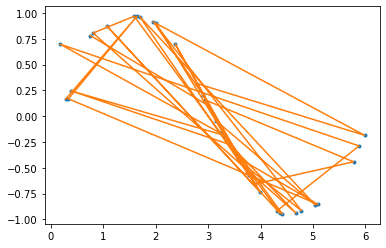

In [47]:
plt.plot(X_test['x'].values, test_predictions, '.')
plt.plot(X_test['x'].values, test_predictions)

In [52]:
X_test['x'].values, test_predictions

(array([0.27925268, 1.6406095 , 0.33161256, 5.09636142, 3.57792497,
        2.37364778, 3.78736448, 2.00712864, 5.98647933, 2.7925268 ,
        3.15904595, 5.04400154, 1.69296937, 3.89208423, 5.77703982,
        2.94960644, 3.63028484, 4.78220215, 1.95476876, 2.89724656,
        3.99680399, 1.06465084, 4.36332313, 1.58824962, 0.80285146,
        4.6774824 , 3.42084533, 0.38397244, 3.31612558, 0.17453293,
        5.88175958, 4.31096325, 4.41568301, 3.2637657 , 3.00196631,
        0.75049158]),
 array([ 0.16450789,  0.96752683,  0.16772868, -0.85463723, -0.40518596,
         0.69709608, -0.57466191,  0.89821461, -0.18579284,  0.31487443,
        -0.04774537, -0.86051652,  0.96497979, -0.6581392 , -0.44293805,
         0.15536115, -0.4476317 , -0.91643054,  0.91564806,  0.20828887,
        -0.7381292 ,  0.87416198, -0.93575507,  0.96767675,  0.80508801,
        -0.94033598, -0.27654643,  0.24442125, -0.18802608,  0.69678633,
        -0.28896091, -0.91923427, -0.94752511, -0.1423974 ,  0.1

In [20]:
y_test.v

array([ 0.26854956,  1.14232858,  0.3470621 , -0.89187439, -0.44311009,
        0.79564968, -0.2383275 ,  0.82104292, -0.23731993,  0.44174071,
        0.19925303, -0.72166243,  0.97911818, -0.97207993, -0.77046924,
        0.41687895, -0.47412304, -1.08784276,  1.10185384,  0.11271175,
       -0.86296144,  0.96149163, -1.15285949,  1.06881456,  0.73799252,
       -0.90590004, -0.27631408,  0.22158   , -0.42330285,  0.05632757,
       -0.67236041, -0.96350788, -0.78266451, -0.10896928,  0.26471045,
        0.51484657])

In [21]:
X_test['x'].values

array([0.27925268, 1.6406095 , 0.33161256, 5.09636142, 3.57792497,
       2.37364778, 3.78736448, 2.00712864, 5.98647933, 2.7925268 ,
       3.15904595, 5.04400154, 1.69296937, 3.89208423, 5.77703982,
       2.94960644, 3.63028484, 4.78220215, 1.95476876, 2.89724656,
       3.99680399, 1.06465084, 4.36332313, 1.58824962, 0.80285146,
       4.6774824 , 3.42084533, 0.38397244, 3.31612558, 0.17453293,
       5.88175958, 4.31096325, 4.41568301, 3.2637657 , 3.00196631,
       0.75049158])

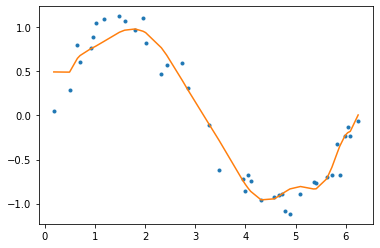

In [31]:
plt.plot(X_test['x'].values, y_test, '.')
plt.plot(X_test['x'].values, test_predictions)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

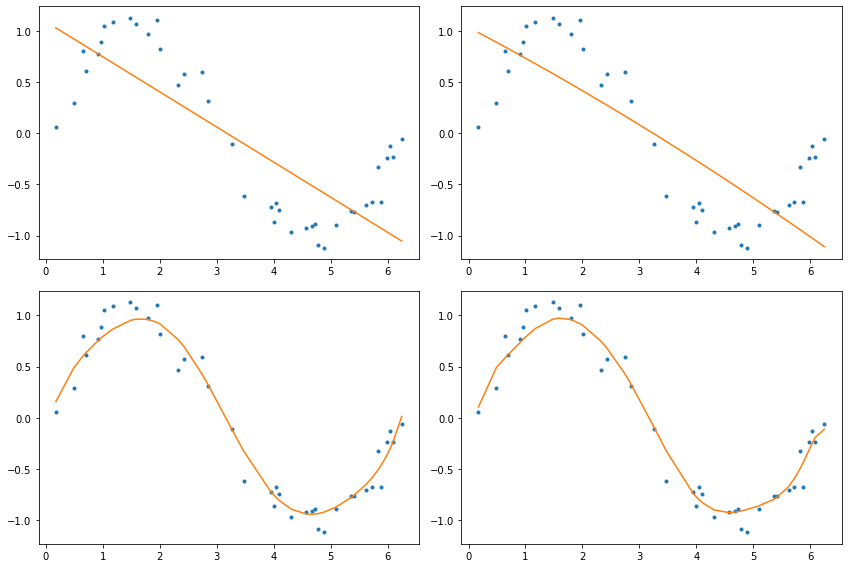

In [30]:
### finding out all the models and plotting them in a row...
col = ['Number of Features', 'mrss_train', 'mrss_test', 'intercept_']
result_df = pd.DataFrame(columns=col, index=[f'n{i}' for i in range(1,16)])
# dict_plot = {1: 441 , 2: 442, 3: 443, 4: 444, 5: 445, 6: 446, 7: 447, 8: 448, 7: 447, 8:448, 9:449, 10:4410,
#        11:4411, 12:4412, 13:4413, 14:4414, 15:4415, 16:4416}
dict_plot = {1: 221 , 3: 222, 8: 223, 11:224}
plt.figure(figsize=(12,8))
for i in range(1,16):
    xt_model = LinearRegression(normalize=True)
    xt_model.fit(X_train.iloc[:,:i], y_train)
    predict_X_train = xt_model.predict(X_train.iloc[:,:i])
    predict_X_test = xt_model.predict(X_test.iloc[:,:i])
    # X_train Error
    mrss_train = np.round( sum( (predict_X_train -  y_train)**2)/y_train.shape[0], 6)
    # print(f'X_train_{i} Error: {mrss_train}')
    mrss_test = np.round(sum( (predict_X_test -  y_test)**2)/y_test.shape[0], 6)
    # print(f'X_test_{i} Error: {mrss_test}')
    # result_df.iloc[i-1]
    result_df.loc[f'n{i}'] = [i, mrss_train, mrss_test, np.round(xt_model.intercept_, 6)]
    if i in dict_plot:
        plt.subplot(dict_plot[i])
        plt.tight_layout()
        plt.plot(X_test['x'], y_test, '.')
        plt.plot(X_test['x'], predict_X_test)
        #plt.show()
#         residuals = predict_X_test - y_test
#         sns.displot(residuals, kind = 'kde')
#         qqplot(data=residuals, line='s')
#         plt.ylabel('Residuals Quantiles')
#         plt.xlabel('Ideal Scaled Quantiles')
#         plt.title('Checking Distribution of Residuals')
#         plt.show()
#         # plt.figure(figsize=(12,8))

#         k = range(0, residuals.shape[0])
#         sns.scatterplot(x=k, y=residuals, s=14)
#         plt.show()
#         plt.bar(x=[i for i in range(i)], height= xt_model.coef_)

        

In [75]:
result_df

,Number of Iterations,mrss_Train,mrss_Test,Intercept
n1,1,0.182001,0.234505,1.088613
n2,2,0.182001,0.234505,1.088613
n3,3,0.181552,0.242229,1.034203
n4,4,0.032749,0.01788,-0.26924
n5,5,0.032704,0.017314,-0.299678
n6,6,0.02828,0.018571,0.140018
n7,7,0.028179,0.018848,0.238817
n8,8,0.027494,0.018681,-0.131522
n9,9,0.027492,0.018713,-0.103955
n10,10,0.027461,0.018428,0.059462


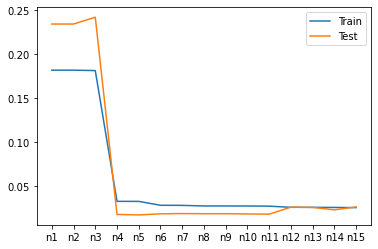

In [106]:
plt.plot(result_df['mrss_Train'], label='Train')
plt.plot(result_df['mrss_Test'], label='Test')
plt.legend()
plt.show()

#### Ridge Regression

Ridge regression is used where exists multicollinearity within the independent variable. Normally the least square method's output is unbiased but the variance is so high that they deviate the original values from the True values. By adding a degree of bias to the cost function (least squares) we can reduce the variance of the standard error.

The normal linear equation is;
y = mx + b

and using least square method;

y-y_hat = y - (mx+b)

Using ridge regression;
y = mx+b+e (error term, the value required to correct the predicted error between the observed and predicted value.

y-y_hat+bias_penalty = y-(mx+b)^2 + lambda*(m)^2

lambda*(m)^2 => penalty factor.


The higher the value of lambda, the less dependent is y on x and the slope (m) decreases.



In [77]:
from sklearn.linear_model import Ridge

In [111]:
penalty_list = [1e-6, 1e-4, 1e-3, 1e-2, 0, 1, 5, 10, 20, 25]

In [112]:
ridge_df_results = pd.DataFrame(index=[f'n{i}' for i in range (1,11)], 
                                columns=['Iteration No.', 'Alpha Value', 'mrss Train',
                                         'mrss Test', 'Intercept_'])

In [113]:
ridge_dict_plot = {0: 331, 1: 332, 2: 333, 3: 334, 4: 335, 5: 336, 6: 337, 7: 338, 8: 339}

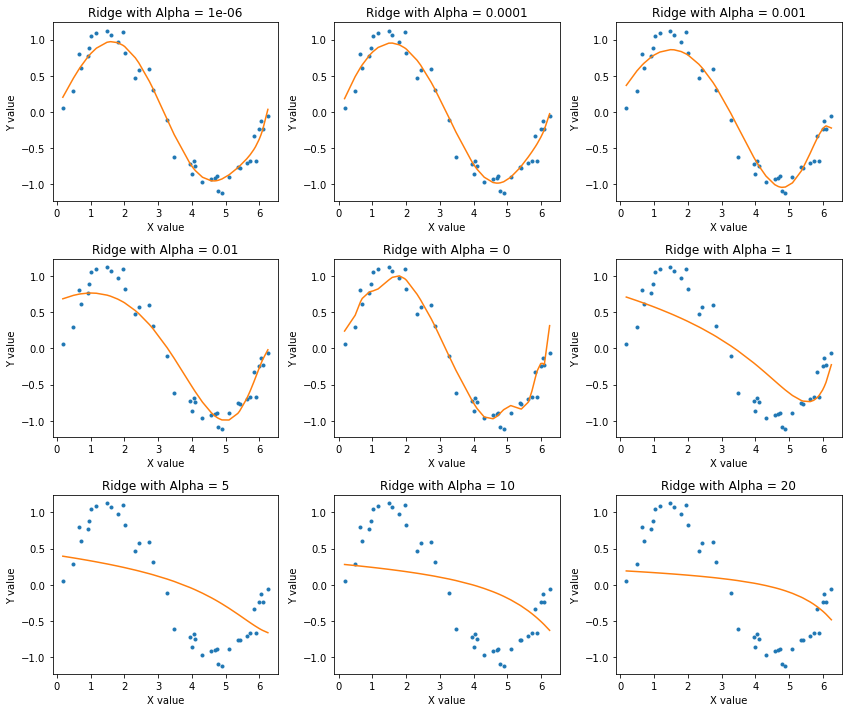

In [136]:
plt.figure(figsize=(12,10))
for i in range(10):
    model = Ridge(alpha=penalty_list[i], normalize=True)
    model.fit(X_train, y_train)
    ridge_train_predictions = model.predict(X_train)
    ridge_test_predictions = model.predict(X_test)
    # Ridge Train Error
    ridge_mrss_train = sum((ridge_train_predictions - y_train)**2)/y_train.shape[0]
    # Ridge Test Error
    ridge_mrss_test = sum((ridge_test_predictions - y_test)**2)/y_test.shape[0]
    ridge_df_results.loc[f'n{i+1}'] = [i+1, penalty_list[i], ridge_mrss_train, 
                                       ridge_mrss_test, model.intercept_]
    if i in ridge_dict_plot:
        plt.subplot(ridge_dict_plot[i])
        plt.tight_layout()
        plt.plot(X_test['x'], y_test, '.', label='Actual')
        plt.plot(X_test['x'], ridge_test_predictions, label='Predicted')
        plt.xlabel('X value')
        plt.ylabel('Y value')
        plt.title(f'Ridge with Alpha = {penalty_list[i]}')
    

In [91]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [116]:
ridge_df_results

,Iteration No.,Alpha Value,mrss Train,mrss Test,Intercept_
n1,1,0.000001,0.027595,0.018557,0.048437
n2,2,0.0001,0.028492,0.018097,-0.014165
n3,3,0.001,0.035929,0.029253,0.237254
n4,4,0.01,0.062518,0.054815,0.651441
n5,5,0,0.025287,0.024829,-1.433486
n6,6,1,0.157634,0.173107,0.736415
n7,7,5,0.280568,0.326284,0.407946
n8,8,10,0.339837,0.390419,0.288772
n9,9,20,0.392191,0.445084,0.196444
n10,10,25,0.407172,0.46113,0.172499


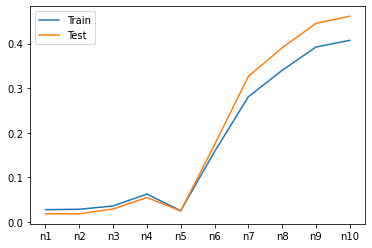

In [115]:
plt.plot(ridge_df_results['mrss Train'], label='Train')
plt.plot(ridge_df_results['mrss Test'], label='Test')
plt.legend()
plt.show()

As above, increasing the penalty causes the less steeper slop and hence, the error keeps increasing to taggle more variance of the test cases.

At n5, penalty was 0 and the train & test errors were also 0. This is kinda strange. It is same as the Linear Model with all the features as checked above...

In [120]:
result_df.loc['n15']

Number of Iterations          15
mrss_Train              0.025626
mrss_Test               0.026405
Intercept               3.548435
Name: n15, dtype: object

In [121]:
ridge_df_results.loc['n5']

Iteration No.           5
Alpha Value             0
mrss Train       0.025287
mrss Test        0.024829
Intercept_      -1.433486
Name: n5, dtype: object

#### Lasso Regression (L1 Regularization)

The lasso regression is similar to ridge regression i.e. it is used to limit the multicollinearity between the independent variables. Just one small different is that in the penalty function, it uses the absolte value of the slope instead of the squared value. This leads to penalizing values which causes some of the parameter estimates to turn out exactly 0.

The ridge regression tends to shrink the slope of some variables to 0 but lasso regression can actually make the slope of some features to 0. This results to variables selection out of given n varibles.

Lasso (Least Absolte Shrinkage and Selection Operator).

In [122]:
from sklearn.linear_model import Lasso

In [128]:
lasso_df_results = pd.DataFrame(index=[f'n{i}' for i in range(1,11)], 
             columns=['Number of Iterations', 'Alpha Value', 'mrss_Train', 'mrss_Test', 'Intercept'])

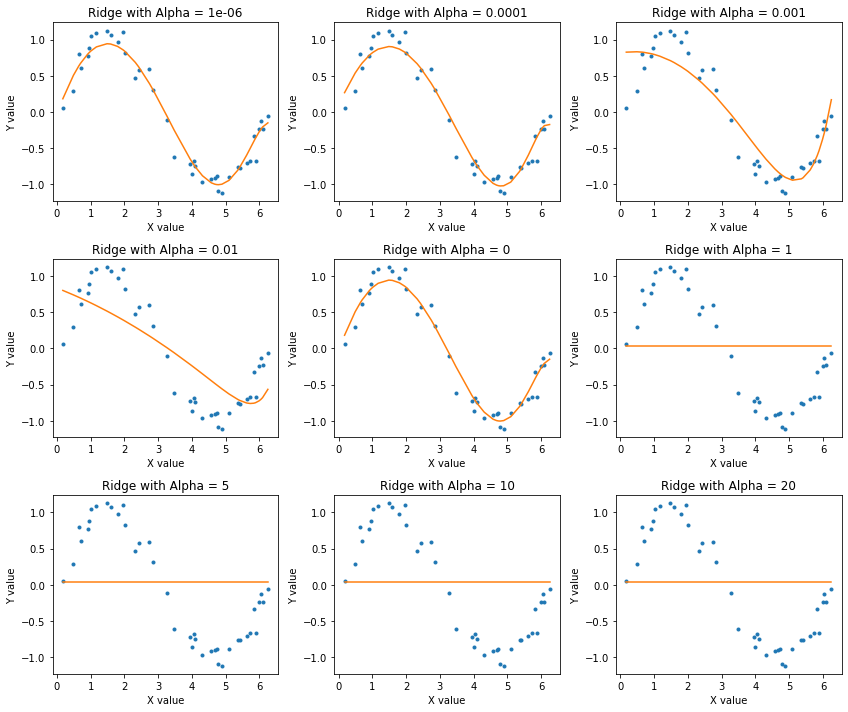

In [129]:
plt.figure(figsize=(12,10))
for i in range(10):
    model = Lasso(alpha=penalty_list[i], normalize=True)
    model.fit(X_train, y_train)
    lasso_train_predictions = model.predict(X_train)
    lasso_test_predictions = model.predict(X_test)
    # Ridge Train Error
    lasso_mrss_train = sum((lasso_train_predictions - y_train)**2)/y_train.shape[0]
    # Ridge Test Error
    lasso_mrss_test = sum((lasso_test_predictions - y_test)**2)/y_test.shape[0]
    lasso_df_results.loc[f'n{i+1}'] = [i+1, penalty_list[i], lasso_mrss_train, 
                                       lasso_mrss_test, model.intercept_]
    if i in ridge_dict_plot:
        plt.subplot(ridge_dict_plot[i])
        plt.tight_layout()
        plt.plot(X_test['x'], y_test, '.', label='Actual')
        plt.plot(X_test['x'], lasso_test_predictions, label='Predicted')
        plt.xlabel('X value')
        plt.ylabel('Y value')
        plt.title(f'Ridge with Alpha = {penalty_list[i]}')
    

So, for Lasso regression, it makes the variables more independent of y and if you see with Alpha = 1 or greater, the regression line is completely horizontal, causing some of the estimates to turn out exactly to be 0.

In [138]:
lasso_df_results

,Number of Iterations,Alpha Value,mrss_Train,mrss_Test,Intercept
n1,1,0.000001,0.030421,0.019395,-0.036575
n2,2,0.0001,0.032755,0.023445,0.084126
n3,3,0.001,0.084068,0.076807,0.814976
n4,4,0.01,0.162268,0.188117,0.833843
n5,5,0,0.0304,0.019347,-0.038025
n6,6,1,0.510004,0.583719,0.036676
n7,7,5,0.510004,0.583719,0.036676
n8,8,10,0.510004,0.583719,0.036676
n9,9,20,0.510004,0.583719,0.036676
n10,10,25,0.510004,0.583719,0.036676


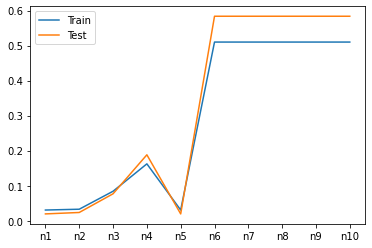

In [131]:
plt.plot(lasso_df_results['mrss_Train'], label='Train')
plt.plot(lasso_df_results['mrss_Test'], label='Test')
plt.legend()
plt.show()

As the penalty value increases, n6 to onwards the error is increased and the line becomes compeletely horizontal due to high penalty rate.

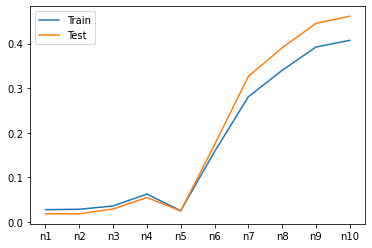

In [137]:
plt.plot(ridge_df_results['mrss Train'], label='Train')
plt.plot(ridge_df_results['mrss Test'], label='Test')
plt.legend()
plt.show()

The optimal value for alpha and a trade off between biass and variance can be found by trying different values of alpha, using Grid Search CV.

Why Ridge regression doesn't shrink some coefficients to 0 like Lasso?

https://stats.stackexchange.com/questions/176599/why-will-ridge-regression-not-shrink-some-coefficients-to-zero-like-lasso